In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import mode

In [2]:
df = pd.read_csv("meteo.csv")

In [3]:
# removing the useless variables that are not wanted for analysis
df = df.drop(columns=['hourly_units.relativehumidity_2m', 'hourly_units.time', 'hourly_units.dewpoint_2m',
                      'hourly_units.snow_height', 'hourly_units.temperature_2m', 'hourly_units.pressure_msl',
                      'hourly_units.precipitation', 'hourly_units.weathercode', 'hourly_units.apparent_temperature','hourly_units.freezinglevel_height'])

In [4]:
# Finding null values in the dataset by the following code, it finds null value from all the dataset
df.isnull().sum()

utc_offset_seconds             0
generationtime_ms              0
latitude                       0
longitude                      0
elevation                      0
hourly.relativehumidity_2m     0
hourly.time                    0
hourly.temperature_2m          0
hourly.snow_height             0
hourly.freezinglevel_height    0
hourly.dewpoint_2m             0
hourly.pressure_msl            0
hourly.precipitation           0
hourly.apparent_temperature    0
hourly.weathercode             0
dtype: int64

In [5]:
df=df.drop_duplicates()

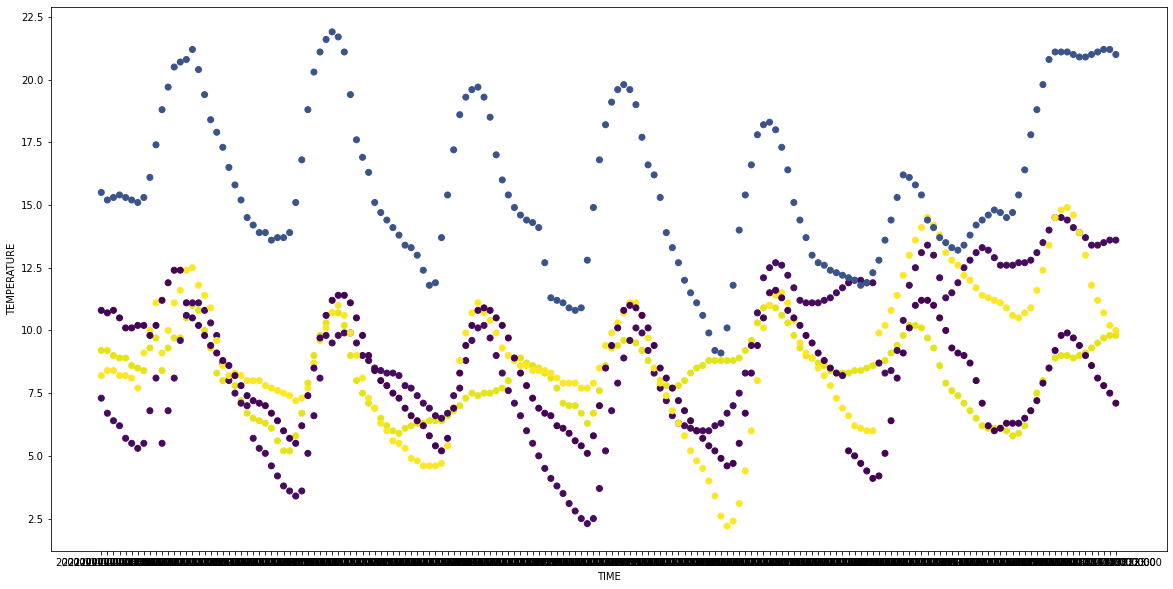

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(df["hourly.time"],df["hourly.temperature_2m"],c=df["elevation"])
plt.xlabel("TIME")
plt.ylabel("TEMPERATURE")
plt.show()

#elevation isn't an indicator of temperature. in order to understand this better, we buildt a correlation matrix

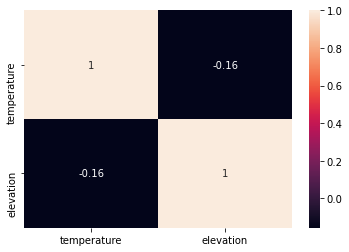

In [7]:
import seaborn as sn
data = { 'temperature': df["hourly.temperature_2m"],
             'elevation': df["elevation"]
        }
datacorr = pd.DataFrame(data,columns=['temperature','elevation'])
corrMatrix = datacorr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#the correlation between temperature and elevation is close to 0, so our first hypotesis is confirmed

In [8]:
# filtering countries according to their latitude 
df_berlin=df.loc[(df['latitude'] == 52.52) ]

df_london=df.loc[(df['latitude'] == 51.5) ]

df_paris = df.loc[(df['latitude'] == 48.86)]

df_tokyo = df.loc[(df['latitude'] == 35.625)]

df_newyork = df.loc[(df['latitude'] == 40.75)]

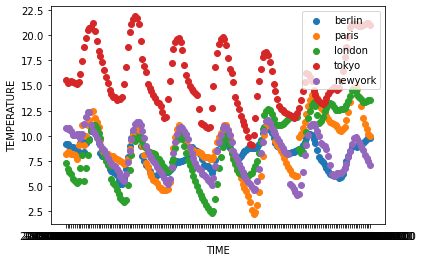

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_berlin["hourly.time"],df_berlin["hourly.temperature_2m"],label='berlin')
ax1.scatter(df_paris["hourly.time"],df_paris["hourly.temperature_2m"],label='paris')
ax1.scatter(df_london["hourly.time"],df_london["hourly.temperature_2m"],label='london')
ax1.scatter(df_tokyo["hourly.time"],df_tokyo["hourly.temperature_2m"],label='tokyo')
ax1.scatter(df_newyork["hourly.time"],df_newyork["hourly.temperature_2m"],label='newyork')
plt.legend(loc='upper right');
plt.xlabel("TIME")
plt.ylabel("TEMPERATURE")
plt.show()
#tokyo has the highest temperature, london the lowers

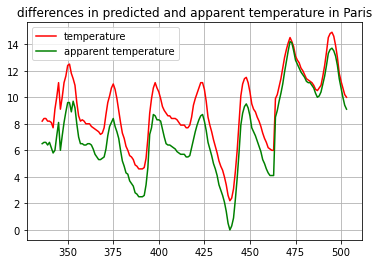

In [11]:
plt.plot(df_paris["hourly.temperature_2m"],color="red", label='temperature')
plt.plot(df_paris["hourly.apparent_temperature"],color="green",label='apparent temperature')
plt.title("differences in predicted and apparent temperature in Paris")
plt.grid()
plt.legend()



plt.show()

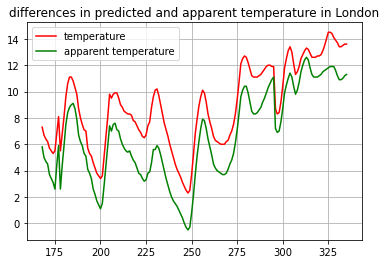

In [12]:
plt.plot(df_london["hourly.temperature_2m"],color="red", label='temperature')
plt.plot(df_london["hourly.apparent_temperature"],color="green",label='apparent temperature')
plt.title("differences in predicted and apparent temperature in London")
plt.grid()
plt.legend()



plt.show()

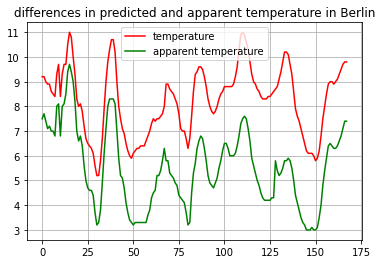

In [13]:
plt.plot(df_berlin["hourly.temperature_2m"],color="red", label='temperature')
plt.plot(df_berlin["hourly.apparent_temperature"],color="green",label='apparent temperature')
plt.title("differences in predicted and apparent temperature in Berlin")
plt.grid()
plt.legend()



plt.show()

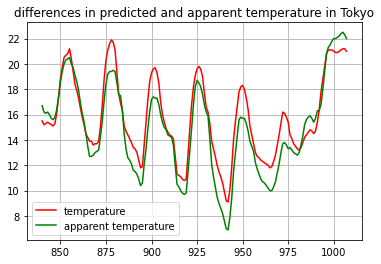

In [14]:
plt.plot(df_tokyo["hourly.temperature_2m"],color="red", label='temperature')
plt.plot(df_tokyo["hourly.apparent_temperature"],color="green",label='apparent temperature')
plt.title("differences in predicted and apparent temperature in Tokyo")
plt.grid()
plt.legend()



plt.show()

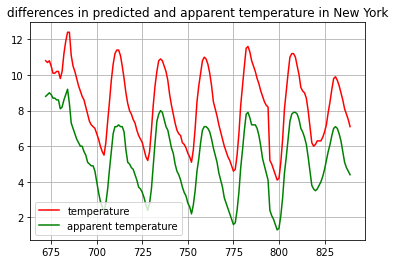

In [15]:
plt.plot(df_newyork["hourly.temperature_2m"],color="red", label='temperature')
plt.plot(df_newyork["hourly.apparent_temperature"],color="green",label='apparent temperature')
plt.title("differences in predicted and apparent temperature in New York")
plt.grid()
plt.legend()



plt.show()
#big differences between predicted and apparent temperature

In [ ]:
#correlation between humidity, precipitation and elevation

datawater = { 'humidity': df["hourly.relativehumidity_2m"],
             'elevation': df["elevation"],
            'precipitation':df["hourly.precipitation"]
        
        }
datacorr2 = pd.DataFrame(datawater,columns=['humidity','elevation','precipitation'])
corrMatrix2 = datacorr2.corr()
sn.heatmap(corrMatrix2, annot=True)
plt.show()

#humidity doesn't seem correlated with precipitation, instead elevation seems to be correlated with humidity